<a href="https://colab.research.google.com/github/Mainabryan/-DropNet-Predicting-University-Dropout-Risk-in-Kenya/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
data = pd.read_csv('/content/e_comerce_dataset-sheet1-sourcetable.csv')

##IMPORT THE NECESSARY LIBRARIES

In [26]:
import pandas as pd
import numpy as np

##EDA

In [27]:
data.head()

,order_id,order_date,customer_id,customer_region,product_id,product_category,product_name,quantity,unit_price,discount_percent,...,total_order_value,loyalty_points_earned,previous_orders_count,customer_segment,product_weight_kg,package_dimensions,inventory_status,supplier_id,reorder_level,stock_quantity
0,1,01/01/2023 00:00:00,5109,USA,36,Electronics,HP Laptop V2,1.0,"1,246.32",10.0,...,"$1,218.36",12184,7,Loyal,9.07,45x22x27cm,Backordered,SUP-7873,38,279
1,2,01/01/2023 00:00:00,3821,USA,70,Electronics,Canon Printer 2023,1.0,"1,340.27",15.0,...,"$1,241.63",12416,11,Loyal,4.04,12x39x22cm,In Stock,SUP-7201,20,332
2,3,01/01/2023 00:00:00,3230,USA,115,Clothing,Gap Hoodie Pro,1.0,135.02,15.0,...,$136.98,1370,8,At-Risk,9.57,33x20x16cm,In Stock,SUP-4432,95,186
3,4,01/01/2023 00:00:00,2938,USA,204,Home & Kitchen,Cuisinart Blender Plus,1.0,211.55,15.0,...,$199.63,1996,12,New,1.09,46x30x11cm,Low Stock,SUP-7482,92,284
4,5,01/01/2023 00:00:00,1202,USA,330,Sports,Reebok Dumbbells,2.0,119.15,15.0,...,$231.78,2318,16,At-Risk,1.45,13x17x9cm,In Stock,SUP-7916,86,82


In [28]:
data.tail()

,order_id,order_date,customer_id,customer_region,product_id,product_category,product_name,quantity,unit_price,discount_percent,...,total_order_value,loyalty_points_earned,previous_orders_count,customer_segment,product_weight_kg,package_dimensions,inventory_status,supplier_id,reorder_level,stock_quantity
36,37,01/01/2023 00:00:00,5765,USA,193,Home & Kitchen,Cuisinart Pot 2023,1.0,341.96,5.0,...,$357.35,3574,24,New,8.69,21x40x21cm,Low Stock,SUP-5557,33,349
37,38,01/01/2023 00:00:00,2790,USA,330,Sports,Reebok Dumbbells,1.0,119.15,10.0,...,$122.00,1220,9,At-Risk,12.22,45x12x19cm,In Stock,SUP-6153,42,215
38,39,01/01/2023 00:00:00,2012,USA,96,Electronics,Fitbit Printer Plus,1.0,"1,147.58",5.0,...,"$1,188.94",11889,6,New,8.28,28x38x27cm,Low Stock,SUP-2989,13,372
39,40,01/01/2023 00:00:00,1283,USA,111,Clothing,Calvin Klein Hoodie V2,1.0,88.42,0.0,...,$101.20,1012,15,New,7.68,27x36x20cm,Low Stock,SUP-4993,68,332
40,41,01/01/2023 00:00:00,2580,USA,20,Electronics,NaN,NaN,NaN,NaN,...,#VALUE!,#VALUE!,14,At-Risk,8.12,32x31x22cm,Backordered,SUP-7180,68,214


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   order_id                   41 non-null     int64  
 1   order_date                 41 non-null     object 
 2   customer_id                41 non-null     int64  
 3   customer_region            41 non-null     object 
 4   product_id                 41 non-null     int64  
 5   product_category           41 non-null     object 
 6   product_name               40 non-null     object 
 7   quantity                   40 non-null     float64
 8   unit_price                 40 non-null     object 
 9   discount_percent           40 non-null     float64
 10  shipping_cost              40 non-null     float64
 11  payment_method             40 non-null     object 
 12  delivery_status            40 non-null     object 
 13  customer_type              40 non-null     object 
 

In [30]:
data.describe()

,order_id,customer_id,product_id,quantity,discount_percent,shipping_cost,review_rating,profit_margin_percent,return_reason,estimated_delivery_days,actual_delivery_days,customer_age,previous_orders_count,product_weight_kg,reorder_level,stock_quantity
count,41.000000,41.000000,41.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,21.000000,3512.048780,167.292683,1.200000,7.250000,9.060250,4.525000,27.605000,NaN,4.682927,5.097561,48.195122,12.365854,8.240244,56.048780,289.926829
std,11.979149,1831.353488,99.564613,0.516398,5.878034,3.436477,0.505736,4.016182,NaN,1.822622,2.059185,17.165692,7.796653,3.855509,28.126457,112.361780
min,1.000000,624.000000,5.000000,1.000000,0.000000,5.160000,4.000000,20.200000,NaN,2.000000,2.000000,18.000000,0.000000,0.990000,13.000000,76.000000
25%,11.000000,2064.000000,96.000000,1.000000,5.000000,5.820000,4.000000,25.075000,NaN,3.000000,3.000000,32.000000,6.000000,5.600000,33.000000,209.000000
50%,21.000000,3480.000000,141.000000,1.000000,5.000000,9.125000,5.000000,27.050000,NaN,5.000000,5.000000,51.000000,12.000000,8.690000,55.000000,320.000000
75%,31.000000,4835.000000,250.000000,1.000000,10.000000,10.992500,5.000000,30.100000,NaN,7.000000,6.000000,61.000000,19.000000,10.820000,81.000000,381.000000
max,41.000000,6904.000000,337.000000,3.000000,20.000000,18.300000,5.000000,37.200000,NaN,7.000000,9.000000,75.000000,25.000000,14.650000,100.000000,486.000000


#Fix And fill the missing values

#Drop sensitive columns

In [31]:
data.drop(columns=['customer_email'], inplace=True)

#Rename columns

In [32]:
data.rename(columns={'profit_amount':'business_profit'}, inplace=True)
data.rename(columns={'customer_segment':'customer_value_tier'}, inplace=True)
data.rename(columns={'revenue_after_discount':'effective_revenue'}, inplace=True)

#Format the data properly

In [33]:
#Remove $ from the columns and convert to float
money_columns = ['total_revenue', 'discount_amount', 'net_revenue',
                 'total_cost', 'business_profit', 'order_total_with_shipping',
                 'effective_revenue', 'tax_amount', 'total_order_value']
for col in money_columns:
   if col in data.columns:
        data[col] = data[col].replace('[\$,]', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='coerce')

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3720993306.py:7: SyntaxWarning: invalid escape sequence '\$'
  data[col] = data[col].replace('[\$,]', '', regex=True)


#Standardlize

In [34]:
print(data['customer_region'].unique())

['USA' 'Canada']


#verify cleaning the service

In [35]:
print(data.isna().sum())


order_id                      0
order_date                    0
customer_id                   0
customer_region               0
product_id                    0
product_category              0
product_name                  1
quantity                      1
unit_price                    1
discount_percent              1
shipping_cost                 1
payment_method                1
delivery_status               1
customer_type                 1
review_rating                 1
profit_margin_percent         1
return_reason                41
total_revenue                 1
discount_amount               1
net_revenue                   1
total_cost                    1
business_profit               1
order_total_with_shipping     1
effective_revenue             1
order_status                  0
warehouse_location            0
shipping_carrier              0
tracking_number               0
estimated_delivery_days       0
actual_delivery_days          0
customer_phone                0
customer

In [36]:
data.isna().sum()

,0
order_id,0
order_date,0
customer_id,0
customer_region,0
product_id,0
product_category,0
product_name,1
quantity,1
unit_price,1
discount_percent,1


In [39]:
# fill in the missing values
import pandas as pd

# --- Clean and convert money columns to numeric ---
money_columns = ['unit_price', 'total_revenue', 'discount_amount', 'net_revenue',
                 'total_cost', 'business_profit', 'order_total_with_shipping',
                 'effective_revenue', 'tax_amount', 'total_order_value']
for col in money_columns:
   if col in data.columns:
        # Ensure the column is treated as string before replace
        data[col] = data[col].astype(str).str.replace('[\$,]', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='coerce')


# --- 1️⃣ Fill text columns with logical defaults ---
data['product_name'] = data['product_name'].fillna('Unknown Product')
data['payment_method'] = data['payment_method'].fillna('Unknown')
data['delivery_status'] = data['delivery_status'].fillna('Pending')
data['customer_type'] = data['customer_type'].fillna('Returning')
data['return_reason'] = data['return_reason'].fillna('Unknown')
data['coupon_code'] = data['coupon_code'].fillna('No Coupon')
data['gift_message'] = data['gift_message'].fillna('None')

# --- 2️⃣ Fill numeric columns (median or logical defaults) ---
data['quantity'] = data['quantity'].fillna(1)
data['unit_price'] = data['unit_price'].fillna(data['unit_price'].median())
data['discount_percent'] = data['discount_percent'].fillna(0)
data['shipping_cost'] = data['shipping_cost'].fillna(data['shipping_cost'].median())
data['review_rating'] = data['review_rating'].fillna(data['review_rating'].median())
data['profit_margin_percent'] = data['profit_margin_percent'].fillna(data['profit_margin_percent'].median())
data['total_cost'] = data['total_cost'].fillna(data['total_cost'].median())
data['tax_amount'] = data['tax_amount'].fillna(data['tax_amount'].median())

# --- 3️⃣ Recalculate derived financial fields ---
# total_revenue = quantity * unit_price
data['total_revenue'] = data['quantity'] * data['unit_price']

# discount_amount = (discount_percent / 100) * total_revenue
data['discount_amount'] = (data['discount_percent'] / 100) * data['total_revenue']

# net_revenue = total_revenue - discount_amount
data['net_revenue'] = data['total_revenue'] - data['discount_amount']

# business_profit = net_revenue - total_cost
data['business_profit'] = data['net_revenue'] - data['total_cost']

# order_total_with_shipping = net_revenue + shipping_cost
data['order_total_with_shipping'] = data['net_revenue'] + data['shipping_cost']

# effective_revenue = same as net_revenue for simplicity
data['effective_revenue'] = data['net_revenue']

# total_order_value = net_revenue + tax_amount + shipping_cost
data['total_order_value'] = data['net_revenue'] + data['tax_amount'] + data['shipping_cost']

# --- 4️⃣ Verify no missing values left ---
missing_summary = data.isna().sum()
print("✅ Missing Values After Cleaning:\n")
print(missing_summary[missing_summary > 0])

# --- 5️⃣ Optional sanity check: view first few cleaned rows ---
print("\n📊 Sample of cleaned dataset:\n")
print(data.head(3))

✅ Missing Values After Cleaning:

Series([], dtype: int64)

📊 Sample of cleaned dataset:

   order_id           order_date  customer_id customer_region  product_id  \
0         1  01/01/2023 00:00:00         5109             USA          36   
1         2  01/01/2023 00:00:00         3821             USA          70   
2         3  01/01/2023 00:00:00         3230             USA         115   

  product_category        product_name  quantity  unit_price  \
0      Electronics        HP Laptop V2       1.0     1246.32   
1      Electronics  Canon Printer 2023       1.0     1340.27   
2         Clothing      Gap Hoodie Pro       1.0      135.02   

   discount_percent  ...  total_order_value loyalty_points_earned  \
0              10.0  ...          1218.3680                 12184   
1              15.0  ...          1241.6295                 12416   
2              15.0  ...           136.9770                  1370   

  previous_orders_count customer_value_tier  product_weight_kg  \
0

<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2872942198.py:11: SyntaxWarning: invalid escape sequence '\$'
  data[col] = data[col].astype(str).str.replace('[\$,]', '', regex=True)


In [40]:
data.isna().sum()

,0
order_id,0
order_date,0
customer_id,0
customer_region,0
product_id,0
product_category,0
product_name,0
quantity,0
unit_price,0
discount_percent,0


##Data overview

In [42]:

print("Shape of the dataset:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nPreview:\n")


Shape of the dataset: (41, 49)

Column Names:
 Index(['order_id', 'order_date', 'customer_id', 'customer_region',
       'product_id', 'product_category', 'product_name', 'quantity',
       'unit_price', 'discount_percent', 'shipping_cost', 'payment_method',
       'delivery_status', 'customer_type', 'review_rating',
       'profit_margin_percent', 'return_reason', 'total_revenue',
       'discount_amount', 'net_revenue', 'total_cost', 'business_profit',
       'order_total_with_shipping', 'effective_revenue', 'order_status',
       'warehouse_location', 'shipping_carrier', 'tracking_number',
       'estimated_delivery_days', 'actual_delivery_days', 'customer_phone',
       'customer_age', 'customer_gender', 'order_source', 'device_type',
       'coupon_code', 'is_gift', 'gift_message', 'tax_amount',
       'total_order_value', 'loyalty_points_earned', 'previous_orders_count',
       'customer_value_tier', 'product_weight_kg', 'package_dimensions',
       'inventory_status', 'supplier_

In [43]:
data.head()

,order_id,order_date,customer_id,customer_region,product_id,product_category,product_name,quantity,unit_price,discount_percent,...,total_order_value,loyalty_points_earned,previous_orders_count,customer_value_tier,product_weight_kg,package_dimensions,inventory_status,supplier_id,reorder_level,stock_quantity
0,1,01/01/2023 00:00:00,5109,USA,36,Electronics,HP Laptop V2,1.0,1246.32,10.0,...,1218.3680,12184,7,Loyal,9.07,45x22x27cm,Backordered,SUP-7873,38,279
1,2,01/01/2023 00:00:00,3821,USA,70,Electronics,Canon Printer 2023,1.0,1340.27,15.0,...,1241.6295,12416,11,Loyal,4.04,12x39x22cm,In Stock,SUP-7201,20,332
2,3,01/01/2023 00:00:00,3230,USA,115,Clothing,Gap Hoodie Pro,1.0,135.02,15.0,...,136.9770,1370,8,At-Risk,9.57,33x20x16cm,In Stock,SUP-4432,95,186
3,4,01/01/2023 00:00:00,2938,USA,204,Home & Kitchen,Cuisinart Blender Plus,1.0,211.55,15.0,...,199.6375,1996,12,New,1.09,46x30x11cm,Low Stock,SUP-7482,92,284
4,5,01/01/2023 00:00:00,1202,USA,330,Sports,Reebok Dumbbells,2.0,119.15,15.0,...,231.7750,2318,16,At-Risk,1.45,13x17x9cm,In Stock,SUP-7916,86,82


##Summary stattistics

In [45]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
order_id,41.0,21.000000,11.979149,1.0000,11.0000,21.000,31.0000,41.000
customer_id,41.0,3512.048780,1831.353488,624.0000,2064.0000,3480.000,4835.0000,6904.000
product_id,41.0,167.292683,99.564613,5.0000,96.0000,141.000,250.0000,337.000
quantity,41.0,1.195122,0.510858,1.0000,1.0000,1.000,1.0000,3.000
unit_price,41.0,337.156951,422.597726,11.7500,88.4200,134.965,340.6200,1340.270
discount_percent,41.0,7.073171,5.913503,0.0000,5.0000,5.000,10.0000,20.000
shipping_cost,41.0,9.061829,3.393264,5.1600,5.8300,9.125,10.9900,18.300
review_rating,41.0,4.536585,0.504854,4.0000,4.0000,5.000,5.0000,5.000
profit_margin_percent,41.0,27.591463,3.966609,20.2000,25.1000,27.050,30.0000,37.200
total_revenue,41.0,389.286951,521.637909,11.7500,96.2600,172.380,347.4300,2551.560


##Check data balance

In [46]:
data.nunique().sort_values(ascending=False)


,0
order_id,41
customer_id,41
customer_phone,41
total_order_value,41
loyalty_points_earned,41
product_weight_kg,41
supplier_id,41
tax_amount,41
package_dimensions,41
tracking_number,41


##Correlation Analysis

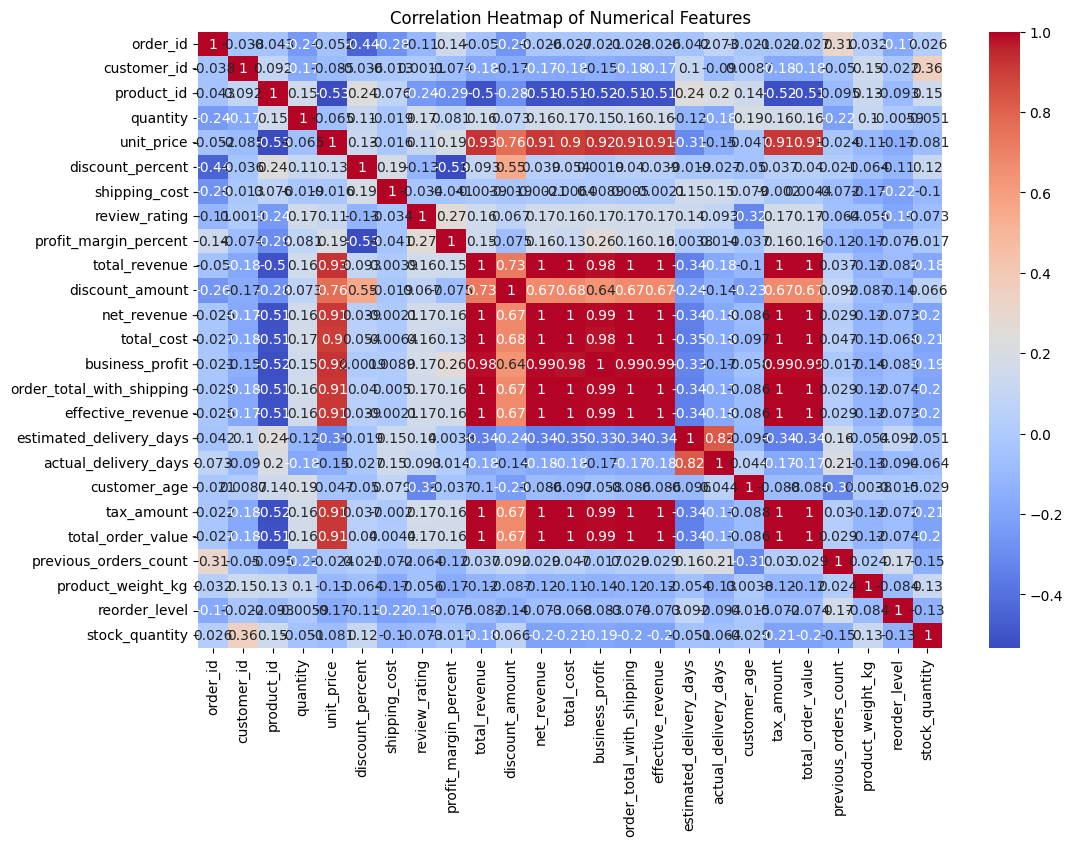

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
